In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv("./spam.txt", sep=" ", header=None)
y = pd.read_csv("./true.txt", sep=" ", header=None)
y = np.ravel(y)
feature_names = X.columns
semilla = 69
p_features = X.shape[1]

In [3]:
from sklearn.pipeline import Pipeline

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier

def get_models():
	models = dict()
	# explore number of features from 1 to i
	for i in range(1,p_features+1):
		n_trees = 1000
		model = RandomForestClassifier(max_features=i, n_estimators=n_trees, oob_score=True, random_state=semilla, n_jobs=-1)
		model.estimator.splitter = 'random'
		models[str(i)] = model
	return models

def evaluate_model(model, X, y):
	
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=semilla)
	test_score = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	
	model.fit(X,y)
	oob_score = model.oob_score_
	return test_score, oob_score

In [5]:
# get the models to evaluate
models = get_models()

In [6]:
# evaluate the models and store results
test_scores, oob_scores = list(), list()
for name, model in models.items():

	# evaluate the model
	test_score, oob_score = evaluate_model(model, X, y)

	# store the results
	test_scores.append(test_score)
	oob_scores.append(oob_score)

/Users/gregoryturri/Documents/uned/rf/rf_py/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/gregoryturri/Documents/uned/rf/rf_py/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [7]:
test_scores_df = pd.DataFrame(test_scores)
oob_scores_df = pd.DataFrame(oob_scores)

In [14]:
test_scores_df.to_csv('test_scores_df_random_splitter_1000trees.csv')
oob_scores_df.to_csv('oob_scores_df_random_splitter_1000trees.csv')

In [9]:
# test_scores_df = pd.read_csv('./test_scores_df_random_splitter.csv', header=None)
# oob_scores_df = pd.read_csv("./oob_scores_df_random_splitter.csv", header=None)

In [10]:
error_test = 1 - test_scores_df
error_oob = 1 - oob_scores_df

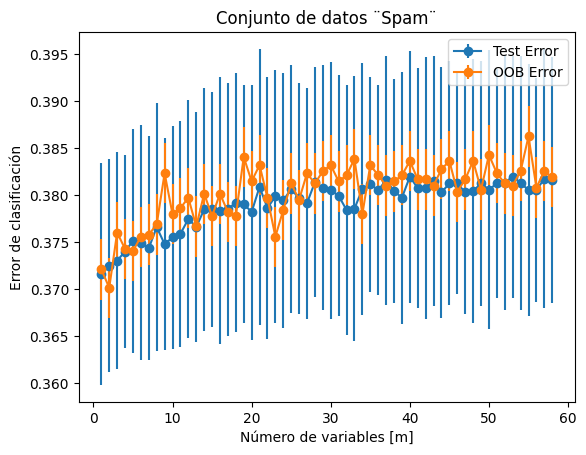

In [11]:
m_features_plot = np.arange(1, len(error_test)+1)
error_test_mean = error_test.mean(axis=1)
error_test_std = error_test.std(axis=1)
error_oob_std = error_oob.std()
error_oob_std_vec = np.repeat(error_oob_std, len(m_features_plot))

# Plot the first series
plt.errorbar(m_features_plot, error_test_mean, yerr=error_test_std, label='Test Error', fmt='-o')

# Plot the second series on the same axis
plt.errorbar(m_features_plot, np.ravel(error_oob), yerr=error_oob_std_vec, label='OOB Error', fmt='-o')

# Add labels and title
plt.xlabel('Número de variables [m]')
plt.ylabel('Error de clasificación')
plt.title('Conjunto de datos ¨Spam¨')
plt.legend()  # Add legend to distinguish between the series

In [49]:
import numpy as np
import plotly.graph_objects as go

# Assuming error_test and error_oob are already defined

m_features_plot = np.arange(1, len(error_test) + 1)
error_test_mean = error_test.mean(axis=1)
error_test_std = error_test.std(axis=1)
error_oob_std = error_oob.std()
error_oob_std_vec = np.repeat(error_oob_std, len(m_features_plot))

# Create Plotly figure
fig = go.Figure()

# Add the first series with error bars
fig.add_trace(go.Scatter(
    x=m_features_plot,
    y=error_test_mean,
    mode='markers+lines',
    name='Error de validación',
    line=dict(color='rgba(50, 150, 200, 1)'),
    error_y=dict(
        type='data',
        array=error_test_std,
        visible=True,
        color='rgba(50, 150, 200, 0.4)'  # Soft blue color
    )
))

# Add the second series with error bars
fig.add_trace(go.Scatter(
    x=m_features_plot,
    y=np.ravel(error_oob),
    mode='markers+lines',
    name='Error OOB',
    line=dict(color='rgba(200, 100, 50, 1)'),
    error_y=dict(
        type='data',
        array=error_oob_std_vec,
        visible=True,
        color='rgba(200, 100, 50, 0.5)'  # Soft orange color
    )
))

# Update layout
fig.update_layout(
    title='Conjunto de datos "Spam"',
    title_x=0.5,
    xaxis_title='Número de variables (m)',
    yaxis_title='Error de clasificación',
    legend=dict(
        x=0.04,  # Adjusted position
        y=0.93,  # Adjusted position
        traceorder='normal',
        font=dict(
            family='Computer Modern',
            size=12,
            color='black'
        ),
        bgcolor='rgba(240, 240, 240, 0.05)',  # Light gray background
        bordercolor='gray',
        borderwidth=1
    ),
    font=dict(
        family='Computer Modern',  # LaTeX-like font
        size=14,
        color='black'
    ),
    plot_bgcolor='rgba(240, 240, 240, 0.5)',
    xaxis=dict(
        showgrid=True,
        gridwidth=0.5,  # Set the width of the grid lines
        gridcolor='lightgray'  # Set the color of the grid lines
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=0.5,  # Set the width of the grid lines
        gridcolor='lightgray'  # Set the color of the grid lines
    ),
    width=1300,  # Set the width of the figure
    height=1000  # Set the height of the figure
)

fig.show()

In [50]:
import numpy as np
import plotly.graph_objects as go

# Assuming error_test and error_oob are already defined

m_features_plot = np.arange(1, len(error_test) + 1)
error_test_mean = error_test.mean(axis=1)
error_test_std = error_test.std(axis=1)
error_oob_std = error_oob.std()
error_oob_std_vec = np.repeat(error_oob_std, len(m_features_plot))

# Create Plotly figure
fig = go.Figure()

# Add the first series with shaded area for test error
fig.add_trace(go.Scatter(
    x=np.concatenate([m_features_plot, m_features_plot[::-1]]),
    y=np.concatenate([error_test_mean + error_test_std, (error_test_mean - error_test_std)[::-1]]),
    fill='toself',
    fillcolor='rgba(50, 150, 200, 0.4)',  # Light blue color for shaded area
    mode='none',
    name='Test Error (± Std Dev)',
    showlegend=False
))

# Add the second series with shaded area for OOB error
fig.add_trace(go.Scatter(
    x=np.concatenate([m_features_plot, m_features_plot[::-1]]),
    y=np.concatenate([np.ravel(error_oob) + error_oob_std_vec, (np.ravel(error_oob) - error_oob_std_vec)[::-1]]),
    fill='toself',
    fillcolor='rgba(200, 100, 50, 0.5)',  # Light orange color for shaded area
    mode='none',
    name='OOB Error (± Std Dev)',
    showlegend=False
))

# Add the lines for test error and OOB error
fig.add_trace(go.Scatter(
    x=m_features_plot,
    y=error_test_mean,
    mode='lines',
    name='Error de validación',
    line=dict(color='rgba(50, 150, 200, 1)')  # Blue color for line
))

fig.add_trace(go.Scatter(
    x=m_features_plot,
    y=np.ravel(error_oob),
    mode='lines',
    name='Error OOB',
    line=dict(color='rgba(200, 100, 50, 1)')  # Orange color for line
))

# Update layout
fig.update_layout(
    title='Conjunto de datos "Spam"',
    title_x=0.5,
    xaxis_title='m (número de variables)',
    yaxis_title='Error de clasificación',
    legend=dict(
        x=0.04,
        y=0.93,
        traceorder='normal',
        font=dict(
            family='Computer Modern',
            size=12,
            color='black'
        ),
        bgcolor='white',#'rgba(240, 240, 240, 0.05)',
        bordercolor='gray',
        borderwidth=1
    ),
    font=dict(
        family='Computer Modern',
        size=14,
        color='black'
    ),
    plot_bgcolor='rgba(240, 240, 240, 0.5)',
    xaxis=dict(
        showgrid=True,
        gridwidth=0.25,
        gridcolor='lightgray',
        tickfont=dict(size=12),
        dtick=2,  # Add more grid lines by reducing the spacing
        rangemode='tozero',  # Start the range at zero
        range=[0, len(m_features_plot) + 1]  # Set the range of the x-axis
    ),
    yaxis=dict(
        showgrid=True,
        gridwidth=0.25,
        gridcolor='lightgray',
        tickfont=dict(size=12),
        dtick=0.0025  # Add more grid lines by reducing the spacing
    ),
    width=1200,
    height=800
)

fig.show()

In [47]:
import plotly.io as pio
pio.write_image(fig, "gemmagreg.eps", format="eps")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido
